V1,V2
2.81,5.62
7.14,8.00
2.72,5.44
3.87,7.74
1.90,3.80
7.82,8.00


[1] "Seems to be a ceiling after about 4 hours of charging time (V1) - Objective: Set every observation greater than |4| (V1) to be predicted as |8| and then create a linear regression model for all observations less than |4| (V1)"


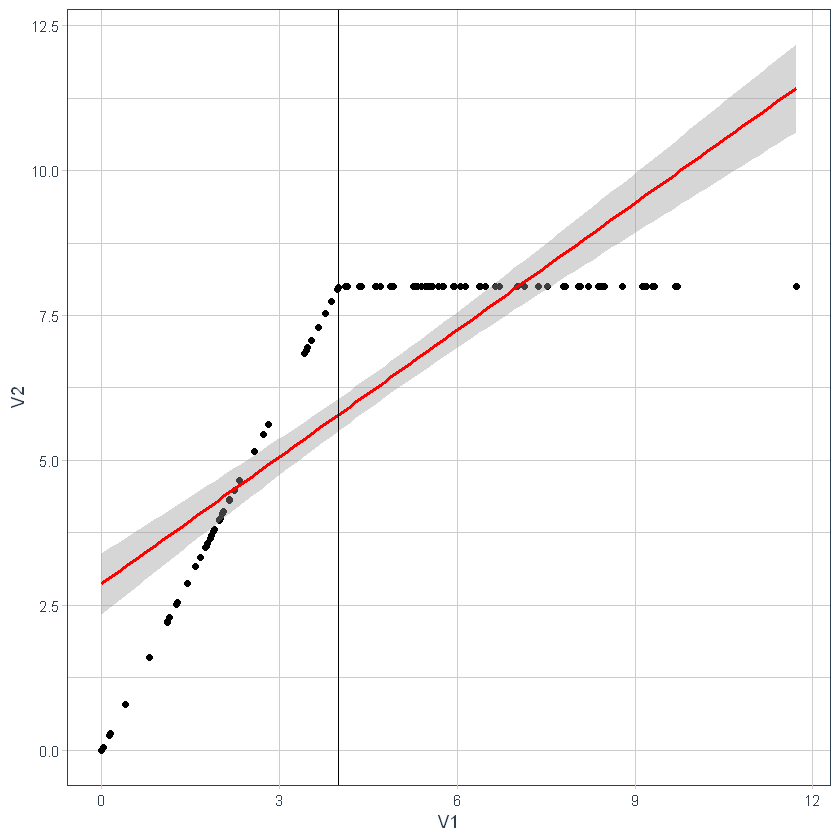

In [26]:
# hackerrank.com/challenges/battery/problem
# Data: https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt
shhh <- suppressPackageStartupMessages
BatteryData <- read.table(file = url("https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt"), strip.white = TRUE, sep = ',', header = FALSE, skip = 0)
head(BatteryData)


library(ggplot2)
library(tidyquant)
shhh(library(dplyr))

BatteryData %>%
  ggplot(aes(x = V1, y = V2)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  geom_vline(xintercept = 4) +
  theme_tq()

print("Seems to be a ceiling after about 4 hours of charging time (V1) - Objective: Set every observation greater than |4| (V1) to be predicted as |8| and then create a linear regression model for all observations less than |4| (V1)")

In [27]:
LinearPredictionModel <- function(TestData){
  TrainData <- read.table(file = url("https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt"), strip.white = TRUE, sep = ',', header = FALSE, skip = 0)
  
  TrainData$LessThanFour <- ifelse(TrainData[, 2] < 4, 1, 0)
  
  LMData <- TrainData %>%
    filter(LessThanFour == 1)
  
  LinearModel <- lm(V1 ~ V2, data = LMData) 
  
  TestData <- data.frame(V2 = TestData)
  
  STDOUT <- ifelse(TestData < 4, predict(LinearModel, newdata = TestData), 8)
  
  return(cat(STDOUT))
}

In [28]:
# Test some custom prediction times:

print("Any observation which is greater than 4 automatically gets assigned an 8, all observations less than 4 gets put through a linear regression model")
TestData <- c(5, 8, 1, 0.2, 3.5)
LinearPredictionModel(TestData)

[1] "Any observation which is greater than 4 automatically gets assigned an 8, all observations less than 4 gets put through a linear regression model"
8 8 0.5 0.1 1.75